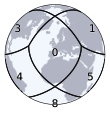

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import healpy as hp
import numpy as np
import matplotlib.patheffects as path_effects


def plot_healpix_grid(
    ax,
    refinement_level,
    color="black",
    fontsize=15,
    linewidth=0.5,
    linestyle="-",
    show_ids=False,
    text_color="black",
    rotate_deg=0,
):
    """Plot HEALPix grid lines for a given refinement_level using NESTED ordering, with optional longitudinal rotation."""
    nside = 2**refinement_level
    npix = hp.nside2npix(nside)
    shift_deg = rotate_deg  # degrees to rotate longitude
    for pix in range(npix):
        boundary = hp.boundaries(nside, pix, step=10, nest=True)
        lon, lat = hp.vec2ang(boundary.T, lonlat=True)
        lon = (lon + shift_deg) % 360  # rotate in degrees
        lon = np.append(lon, lon[0])
        lat = np.append(lat, lat[0])

        ax.plot(
            lon,
            lat,
            transform=ccrs.Geodetic(),
            color=color,
            linewidth=linewidth,
            linestyle=linestyle,
        )

        if show_ids:
            vec = hp.pix2vec(nside, pix, nest=True)
            vec = np.array(vec).T
            lon_c, lat_c = hp.vec2ang(vec, lonlat=True)
            lon_c = (lon_c + shift_deg) % 360  # apply same rotation

            ax.text(
                lon_c[0],
                lat_c[0],
                str(pix),
                transform=ccrs.Geodetic(),
                fontsize=fontsize,
                ha="center",
                va="center",
                color=text_color,
                path_effects=[
                    path_effects.Stroke(linewidth=0.75, foreground="white"),
                    path_effects.Normal(),
                ],
            )


# Create the figure
fig = plt.figure(figsize=(2, 2), dpi=50)
fig.patch.set_alpha(0.0)

# Globe projection
projection = ccrs.Orthographic(central_longitude=0, central_latitude=40)
ax = plt.axes([0, 0, 1, 1], projection=projection)
ax.set_global()
ax.patch.set_alpha(0.0)

# Colors
land = "#B1B5C3"
ocean = "#F2F7FD"
text_colour2 = "#100F0F"

# Add map features
ax.add_feature(cfeature.LAND, facecolor=land)
ax.add_feature(cfeature.OCEAN, facecolor=ocean)
ax.coastlines(resolution="110m", color=land)

# Plot rotated HEALPix grid (45 degrees = π/4 radians)
plot_healpix_grid(
    ax,
    refinement_level=0,
    color=text_colour2,
    linewidth=1.5,
    linestyle="-",
    show_ids=True,
    rotate_deg=-45,
)

# Save or show
plt.savefig(
    "logo_with_ids_rotated45deg.png",
    transparent=True,
    bbox_inches="tight",
    pad_inches=0.1,
)
plt.show()
plt.close()